# Récupération des données des mailles Safran pour retrpouver ce quadrillage et le faire correspondre à nos données

In [7]:
import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:
#### On ne s'intéresse ici qu'aux Landes
df = pd.read_csv('mailles_safran_drias-20200206.csv')
df_landes = df[df['departement'] == '40 - Landes']
df_landes.to_csv('mailles_landes.csv')

In [29]:
geo_df.crs = 'EPSG:4326'

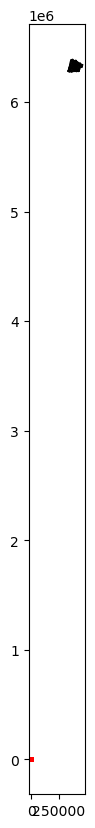

In [37]:
# Plottons la carte du département pour localiser les mailles

# Load shapefile for the French department
department_shp = "40-.shp"
department = gpd.read_file(department_shp)

# Load your geolocation data (assuming it's a DataFrame with columns 'Latitude' and 'Longitude')
# Replace 'your_data.csv' with the path to your CSV file
geo_data = pd.read_csv('mailles_landes.csv')

# Convert your geolocation data to a GeoDataFrame
geometry = gpd.points_from_xy(geo_data['longitude'], geo_data['latitude'])
geo_df = gpd.GeoDataFrame(geo_data, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))
department.plot(ax=ax, color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, color='red', markersize=5)

# Show the plot
plt.show()

In [35]:
print(geo_df['latitude'].dtype)

float64


In [41]:
import folium
from folium.plugins import MarkerCluster

# Create a Folium map centered around the department
m = folium.Map(location=[department.centroid.y.mean(), department.centroid.x.mean()], zoom_start=10)

# Add department shapefile to the map
folium.GeoJson(department).add_to(m)

# Create a marker cluster layer for the geolocation data
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each point in the geolocation data
for idx, row in geo_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
m
